In [1]:
import scanpy as sc
import muon as mu
import numpy as np
import pandas as pd
import mofax as mofa
import seaborn as sns
import matplotlib.pyplot as plt
import pyro
from pyro.nn import PyroSample, PyroModule
from pyro.infer import SVI, Trace_ELBO, autoguide
import torch
import torch.nn.functional as F
from torch.nn.functional import softplus
from sklearn.metrics import mean_squared_error
import random
import seaborn as sns
import muon as mu
import anndata

/scratch/venvs/deeplife2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dir="/scratch/deeplife/"
dir="/scratch/deeplife/projekt/data/"
neurips = anndata.read_h5ad(dir+"neurips2021.h5ad")
neurips.var_names_make_unique()
neurips.layers["counts"] = neurips.X.copy()
sc.pp.log1p(neurips)

/scratch/venvs/deeplife2/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
protein = neurips[:, neurips.var["feature_types"] == "ADT"].copy()
rna = neurips[:, neurips.var["feature_types"] == "GEX"].copy()
rna = rna[:, rna.X.sum(axis=0) > 10].copy()
datasets = {
    'rna': rna.X,
    'protein': protein.X,
}# protein.X = protein.X.toarray()
# rna.X = rna.X.toarray()
# for k in rna.layers:
#     rna.layers[k] = rna.layers[k].toarray()
# for k in protein.layers:
#     protein.layers[k] = protein.layers[k].toarray()


In [4]:
mudata = mu.MuData({
    "protein": protein,
    "rna": rna
})

In [ ]:
mu.tl.mofa(mudata, n_factors=10, convergence_mode='medium', outfile=dir+"../models/muon_mofa_neurips_k10.hdf5", gpu_mode=False, use_obs="union", use_float32=True, likelihoods="gaussian")


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
use_float32 set to True: replacing float64 arrays by float32 arrays to speed up computations...

Loaded view='protein' group='group1' with N=90261 samples and D=134 features...
Loaded view='rna' group='group1' with N=90261 samples and D=13953 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on t

In [17]:
import h5py
f=h5py.File(dir+"../models/muon_mofa_neurips_k10.hdf5", "r")

In [ ]:
print(f.keys())

# f["data"]
# f.close()
f["expectations/Z/group1"]

In [8]:
import mofax
mfxm = mofax.mofa_model(dir+"../models/muon_mofa_neurips.hdf5")

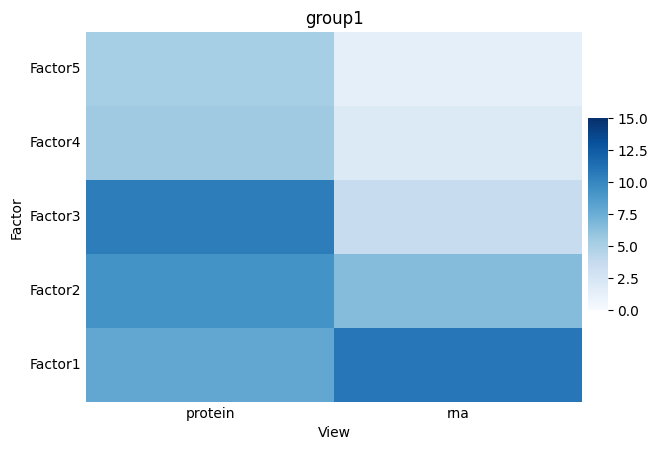

In [12]:
mfxm.get_r2()
mofax.plot_r2(mfxm, x='View', vmax=15)

In [10]:
#rna.var['feature_types'].index

#mfxm.samples

mfxm.model.visititems(lambda a, b: print(a))

#np.array([*rna.var['feature_types'].index])

np.array(mfxm.model['model_options'].keys())

data
data/protein
data/protein/group1
data/rna
data/rna/group1
expectations
expectations/W
expectations/W/protein
expectations/W/rna
expectations/Z
expectations/Z/group1
features
features/protein
features/rna
features_metadata
features_metadata/protein
features_metadata/protein/feature_types
features_metadata/protein/gene_ids
features_metadata/protein/genome
features_metadata/rna
features_metadata/rna/feature_types
features_metadata/rna/gene_ids
features_metadata/rna/genome
groups
groups/groups
intercepts
intercepts/protein
intercepts/protein/group1
intercepts/rna
intercepts/rna/group1
model_options
model_options/ard_factors
model_options/ard_weights
model_options/likelihoods
model_options/spikeslab_factors
model_options/spikeslab_weights
samples
samples/group1
training_opts
training_stats
training_stats/elbo
training_stats/number_factors
training_stats/time
variance_explained
variance_explained/r2_per_factor
variance_explained/r2_per_factor/group1
variance_explained/r2_total
variance_

array(<KeysViewHDF5 ['ard_factors', 'ard_weights', 'likelihoods', 'spikeslab_factors', 'spikeslab_weights']>,
      dtype=object)